# Curve Fitting

[Jupyter Notebook](https://lancejnelson.github.io/PH135/jupyter/fitting.ipynb) . 


Often in science you will gather data as a way to explore the relationship between two physical quantities and/or to validate your theories.  For example, perhaps you are interested how the amount of fertilizer applied to your tomato plants affect the final size of the fruit. Or maybe you want to know how a planet's distance from the sun affects it's orbital period. Investigating these kinds of questions are the very essence of science and great scientific discoveries begin with simple questions posed by curious minds.  As a brief reminder, the steps to the scientific process are:  
   1. Formulate a question.  
   2. Form a hypothesis.  
   3. Use your hypothesis to make a prediction.  
   4. Test your prediction.  
   5. Analyze the results and fine tune your theory.  

The process of gathering data and analyzing it, hoping to draw conclusions and establish physical laws are what steps 4 and 5 are all about. One computational tool that will help you establish firm relationships is called curve fitting.  Curve fitting is the process of finding a function that matches your data as closely as possible. Finding a best-fit function that agrees with your hypothesis can be a valuable step in verifying or proving a theory. Other useful mathematical conclusions can be drawn from it as well.  

As a simple example consider the stopping time for a car with its brakes locked up (most modern cars are designed to prevent this).    The question is: How does the stopping time depend on the car's initial speed. If you are familiar with Newtonian mechanics at all, you might hypothesize that the acceleration of the car should not depend on the initial velocity and hence the stopping time will increase linearly with the initial speed.  Furthermore, the following kinematic equation  
$$
\begin{align*}
v_f &= v_i - a \Delta t\\
0 &= v_i - \mu_k g \Delta t\\ 
\Delta t &= {v_i\over \mu_k g}
\end{align*}
$$ 
would suggest that the slope of $\Delta t$ vs. $v_i$ function is  ${1\over a} = {1\over \mu g}$.  In other words, the theory of kinematics suggest that the acceleration should be independent of initial speed.  To prove your idea, you should first measure the stopping time for cars with a variety of initial speeds (shown below).

|Initial Speed (m/s)|Skid time (s)|
|-------------|---------|
| 12 | 3.23|
| 17 | 3.43|
| 22 | 4.67|
| 25 | 5.45|
| 29 | 6.00|
| 38 | 8.52|


Text(0.5, 1.0, 'Skid time vs initial speed')

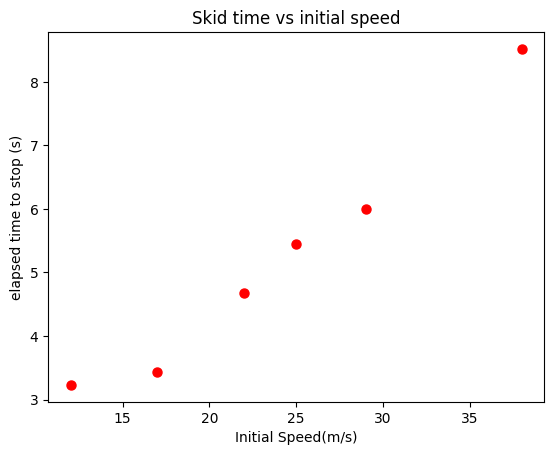

In [5]:
#| echo: false

from matplotlib import pyplot as plt

t = [3.23,3.43,4.67,5.45,6,8.52]
vi = [12,17,22,25,29,38]
plt.plot(vi,t,'r.',ms = 13)
plt.xlabel("Initial Speed(m/s)")
plt.ylabel("elapsed time to stop (s)")
plt.title("Skid time vs initial speed")

We notice that the data **looks** linear which matches our hypothesis that the acceleration is constant.  

## Fitting to a polynomial 

The next thing to do is to find the line that passes through the data points as close as possible.  When the fit function is a polynomial , we can use the `polyfit` function from numpy.  This function takes three argument: the independent data set, the dependent data set, and the order of the polynomial


```
polyfit(x,y,order)
```

The `polyfit` function returns a list of numbers containing the function parameters for the best fit function.

In [6]:
from matplotlib import pyplot as plt
from numpy import polyfit

t = [3.23,3.43,4.67,5.45,6,8.52]
vi = [12,17,22,25,29,38]

params = polyfit(vi,t,1)
slope = params[0]
yint = params[1]

g=9.8 #Acceleration due to gravity
mu = 1/(slope * g)
print(params)
print(mu)


[0.20971747 0.21840032]
0.48656326406696404


In this case, $0.2097$ is the slope of the best-fit function and $0.2184$ is the y-intercept of the best fit function.  Remembering our theory from above, we notice that the slope of this fit function can be used to calculate the coefficient of friction between the rubber tires and the roadway.
$$
\begin{align*}
m &= {1\over \mu g}\\
\mu &= {1\over m g}
\end{align*}
$$
It is often useful to plot the fit function on top of the data to verify that it really matches the data.


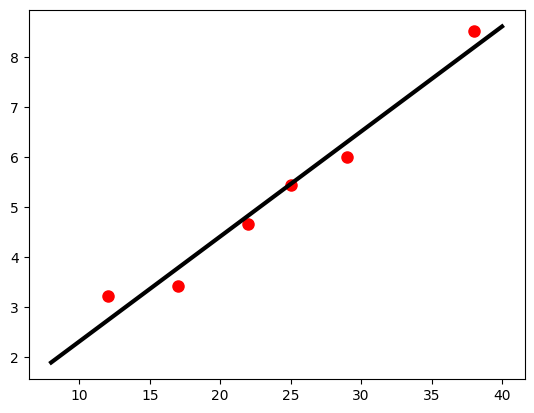

In [7]:
from matplotlib import pyplot as plt
from numpy import polyfit,linspace

t = [3.23,3.43,4.67,5.45,6,8.52]
vi = [12,17,22,25,29,38]

params = polyfit(vi,t,1)
vDense = linspace(8,40,100)
tDense = params[0] * vDense + params[1]

plt.plot(vi,t,'r.',ms = 16)
plt.plot(vDense,tDense,'k',lw = 3)


### Assessing the quality of the fit
Sometimes it might not be clear what type of function you should fit to.  A good way to measure the quality of a fit it so sum the square of the difference between the fit function and the data.
$$
\sum_i (y_i - f(x_i))^2
$$
You can make `polyfit` do this for you using the  `full = True` keyword argument.  Now the function will return a list of 5 things: the first is the list of fitting parameters and the second thing is the sum of the square of the errors.  Fits with big values for this sum are not as good as those with lower values.   


(array([0.20971747, 0.21840032]), array([0.5970499]), 2, array([1.39416426, 0.23728891]), 1.3322676295501878e-15)
(array([0.00355921, 0.03155988, 2.19430388]), array([0.20224448]), 3, array([1.68213068, 0.41037028, 0.04508436]), 1.3322676295501878e-15)


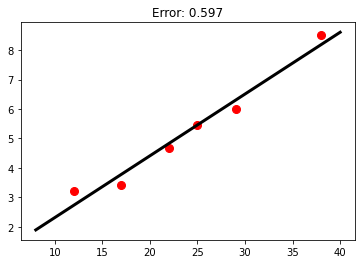

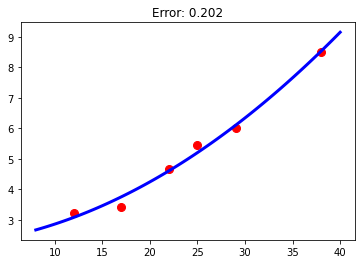

In [1]:
#| layout-ncol: 2

from matplotlib import pyplot as plt
from numpy import polyfit,linspace

t = [3.23,3.43,4.67,5.45,6,8.52]
vi = [12,17,22,25,29,38]

paramsLinear = polyfit(vi,t,1,full=True)
paramsQuadratic = polyfit(vi,t,2,full=True)
vDense = linspace(8,40,100)
tDenseLinear = paramsLinear[0][0] * vDense + paramsLinear[0][1]
tDenseQuadratic = paramsQuadratic[0][0] * vDense**2 + paramsQuadratic[0][1] * vDense + paramsQuadratic[0][2]

print(paramsLinear)
print(paramsQuadratic)
errorLinear = paramsLinear[1][0]
errorQuadratic = paramsQuadratic[1][0]

plt.plot(vi,t,'r.',ms = 16)
plt.plot(vDense,tDenseLinear,'k',lw = 3)
plt.title(f"Error: {errorLinear:1.3f}")
plt.show()


plt.plot(vi,t,'r.',ms = 16)
plt.plot(vDense,tDenseQuadratic,'b',lw = 3)
plt.title(f"Error: {errorQuadratic:1.3f}")
plt.show()


## Other functions for curve fitting.

If the fit function is a polynomial, `polyfit` is a great choice but there are times when the hypothesized functions is not a polynomial. In cases like this, the function `scipy.optimize.curve_fit` should work.  As an example, let's say that you have the following intensity vs. wavelength data.


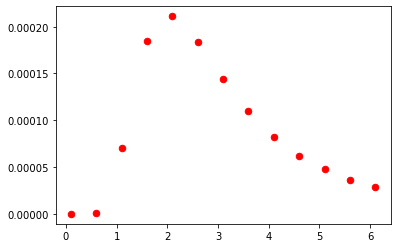

In [1]:
#| echo: false

from matplotlib import pyplot as plt

wavelength = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1]
intensity = [0, 7.43023e-7, 0.0000699768, 0.000184459,0.000211137, 0.000183716, 0.000144493, 0.000109646, 0.0000825034, 0.0000623056, 0.0000474756, 0.0000365799, 0.0000285178]
plt.plot(wavelength,intensity,'r.',ms = 13)

If you suspected that the fit function looked like this $$I(\lambda) = a \lambda^{-5} {1\over \exp{b\over \lambda} - 1}$$, you could find the values of a and b that made the function fit the data like this:


(array([0.99999919, 9.99999571]), array([[2.64127671e-12, 5.30275269e-12],
       [5.30275269e-12, 1.17229413e-11]]))


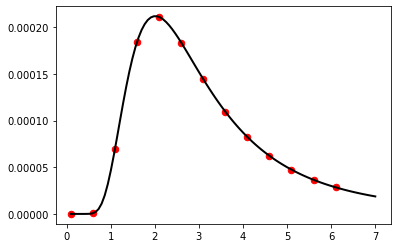

In [2]:
#| echo: true
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from numpy import exp,log,linspace

def fit_function(wvlength,a,b):
  return a * wvlength**-5 * 1/(exp(b/wvlength) - 1)

wavelength = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1]
intensity = [0, 7.43023e-7, 0.0000699768, 0.000184459, \
0.000211137, 0.000183716, 0.000144493, 0.000109646, 0.0000825034, \
0.0000623056, 0.0000474756, 0.0000365799, 0.0000285178]

params = curve_fit(fit_function,wavelength,intensity)
print(params)
wDense = linspace(0.1,7,100)
iDense = params[0][0] * wDense**-5 * 1/(exp(params[0][1]/wDense) - 1)

plt.plot(wavelength,intensity,'r.',ms = 13)
plt.plot(wDense,iDense,'k',lw = 2)

Notice that the `curve_fit` function returns more than just the fit paramters.  It also returns a $2$ x $2$ matrix containing the uncertainties on the fit parameters.  If you want to calculate the fit error, you'll have to do it manually, using the equation
$$
\sum_i (y_i - f(x_i))^2
$$


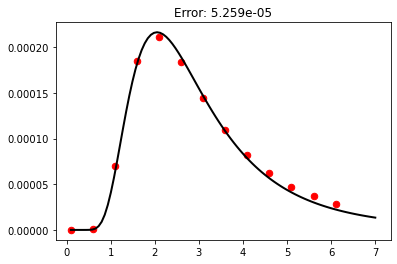

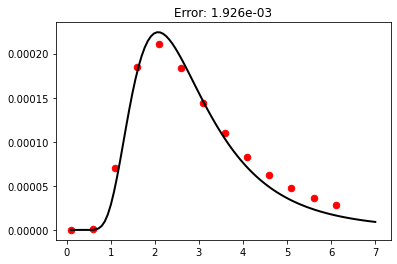

In [37]:
#| layout-ncol: 2

from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from numpy import exp,log,diagonal,sqrt,array

def fit_function(wvlength,a,b):
  return a * wvlength**-5 * 1/(exp(b/wvlength) + 1)

def fit_function_two(wvlength,a,b):
  return a * wvlength**-6 * 1/(exp(b/wvlength) + 1)

wavelength = array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1])
intensity = array([0, 7.43023e-7, 0.0000699768, 0.000184459, 0.000211137, 0.000183716, 0.000144493, 0.000109646, 0.0000825034, 0.0000623056, 0.0000474756, 0.0000365799, 0.0000285178])

paramsOne = curve_fit(fit_function,wavelength,intensity)
paramsTwo = curve_fit(fit_function_two,wavelength,intensity)
wDense = linspace(0.1,7,100)
iDenseOne = paramsOne[0][0] * wDense**-5 * 1/(exp(paramsOne[0][1]/wDense) + 1)
iDenseTwo = paramsTwo[0][0] * wDense**-6 * 1/(exp(paramsTwo[0][1]/wDense) + 1)

errorOne = sum(sqrt( (intensity - fit_function(wavelength,paramsOne[0][0],paramsOne[0][1]))**2 ))
errorTwo = sum(sqrt( (intensity - fit_function(wavelength,paramsTwo[0][0],paramsTwo[0][1]))**2 ))

plt.plot(wavelength,intensity,'r.',ms = 13)
plt.plot(wDense,iDenseOne,'k',lw = 2)
plt.title(f"Error: {errorOne:1.3e}")
plt.show()


plt.plot(wavelength,intensity,'r.',ms = 13)
plt.plot(wDense,iDenseTwo,'k',lw = 2)
plt.title(f"Error: {errorTwo:1.3e}")
plt.show()

## Flashcards
1. What python function should you use to fit a polynomial to your data? Give an example of its usage.
2. What python function should you use to fit a function that is not a polynomial to your data.  Give an example of how to use this function.
3. What is the output from the `polyfit` function?
4. What is the output from the `curve_fit` function?
5. How can you assess the quality of a fit function?
6. Why did the Savior teach in parables?




## Exercises
1. You push a box with five known forces while using a motion detector to measure the cart's acceleration. The data are shown below.   

   1. Plot the data with force on the vertical axis and acceleration on the horizontal axis.  
   2. Fit a polynomial function of order one (linear function) to this data. 
   3. Fit a polynomial function of order two (quadratic function) to this data.
   4. Determine which is the better fit. 
   5. Plot the best-fit functions on top of the data.
   6. Determine the mass of the box.  

|Force (N)|acceleration (m/s)|
|-------------|---------|
| 0.25 | 0.5|
| 0.50 | 0.8|
| 0.75 | 1.3|
| 1.0 | 1.8|
| 1.25 | 2.1|  

The mass is equal to 0.59 kg


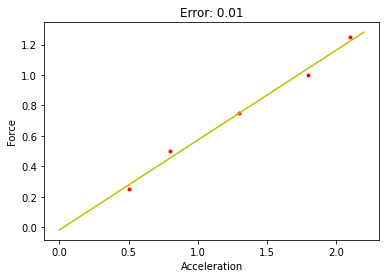

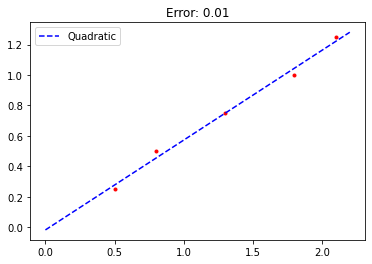

In [3]:
import numpy as np
from matplotlib import pyplot as plt
F = [0.25,0.5,0.75,1,1.25]
acc = [0.5,0.8,1.3,1.8,2.1]

plt.plot(acc,F,'r.')
plt.xlabel("Acceleration")
plt.ylabel("Force")

fit = np.polyfit(acc,F,1,full=True)
slope = fit[0][0]
intercept = fit[0][1]
error = fit[1][0]
print(f'The mass is equal to {slope:.2f} kg')

x = np.linspace(0,2.2,100)
plt.plot(x,slope*x+intercept,'y',label='Linear')
plt.title(f'Error: {error:.2f}')
plt.show()

quad_fit = np.polyfit(acc,F,2,full=True)
a= quad_fit[0][0]
b = quad_fit[0][1]
c = quad_fit[0][2]
QError=quad_fit[1][0]

plt.plot(acc,F,'r.')
plt.plot(x,a*x**2+b*x+c,'b',ls='--',label='Quadratic')
plt.legend()
plt.title(f'Error: {QError:.2f}')
plt.show()

2. Your friend wants to know the acceleration of his car and asks you to help him.  You set up a motion detector that allows you to measure the position of the car at regular intervals.  Your data are as follows:  
   1. Plot the data with time on the horizontal axis and position on the vertical.
   2. Fit a polynomial function of order one (linear function) to this data.
   3. Fit a polynomial function of order two (quadratic function) to this data.
   4. Determine which is the better fit.
   5. Plot the best-fit functions on top of the data.
   6. Calculate the acceleration of the car using the best fit.

|Time (s)|Position (m)|
|-------------|---------|
| 0.0 | 0.256|
| 0.1 | 0.249|
| 0.2 | 0.195|
| 0.3 | 0.514|
| 0.4 | 0.538|
| 0.5 | 0.785|
| 0.6 | 1.11|
| 0.7 | 1.31|
| 0.8 | 1.81|
| 0.9 | 2.32|
| 1.0 | 2.74|  


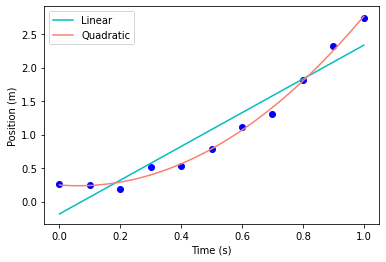

Quadtratic fits this data better.
x = 0.248-0.362t+0.5(2.881)t^2
Acceleration = 2.881 m/s^2


In [27]:
time = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
position = [0.256,0.249,0.195,0.514,0.538,0.785,1.11,1.31,1.81,2.32,2.74]
plt.plot(time,position,'bo')
slope, intercept = np.polyfit(time,position,1)
a,b,c = np.polyfit(time,position,2)

x = np.linspace(0,1,100)
lin = slope*x+intercept
quad = a*x**2 +b*x+c
plt.plot(x,lin,'c',label='Linear')
plt.plot(x,quad,'salmon',label='Quadratic')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.show()

print('Quadtratic fits this data better.')
print(f'x = {c:.3f}{b:.3f}t+0.5({a:.3f})t^2')
print(f'Acceleration = {a:.3f} m/s^2')

3. The takeoff speed for a passenger airline jet is $80$ m/s. Velocity data measured during takeoff are given in the table below.  
   1. Plot the data and fit a linear function to the data set.  Do you find good evidence that the acceleration of the airplane is constant.
   2. Plot the best-fit function on top of the data.
   3. At what time will the airplane achieve liftoff?    

|Time (s)|Velocity (m/s)|
|-------------|---------|
| 0 | 0|
| 10 | 23|
| 20 | 46|
| 30 | 69|  


This is a very linear graph.
The plane will liftoff at 34.783 seconds


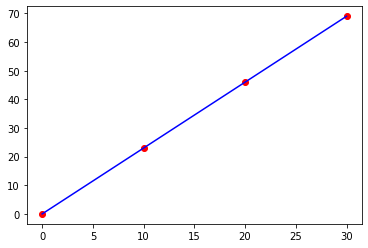

In [32]:
time = [0,10,20,30]
velocity = [0,23,46,69]
plt.plot(time,velocity,'ro')

m,b = np.polyfit(time,velocity,1)
x = np.linspace(0,30,200)
y = m*x+b
plt.plot(x,y,'b')
print('This is a very linear graph.')

v = 80
acc = m
t = v/acc
print(f'The plane will liftoff at {t:.3f} seconds')

4. In PH123 you'll learn about ideal gases and the processes associated with them. One such process is called an adiabatic process.  The relationship between the temperature and the volume in an adiabatic process is 
$$
T(V) = {C\over V^{\gamma -1}}
$$

For your experiment you compress a cylinder of gas four different times and measure the temperature of the gas.

|Volume (m$^3$)| Temperature ($^\circ$ C)|
|---------------|-------------------------|
0.481 |35|
0.412|68|
0.347|110|
0.299|150|

 1. Plot temperature vs. volume. Make sure the volumes are in cubic *meters* and the temperatures are in Kelvins: $$T_K = T_C + 273$$.
 2. Fit the function mentioned above to this data.
 3. Plot the best-fit function on top of the data.
 4. Calculate gamma.  The value of gamma is an indication of what type of gas is present in the cylinder. $\gamma = 1.4$ for a diatomic gas and $\gamma = 1.67$ for a monatomic gas.


Gamma = 1.67


Text(0, 0.5, 'Temperature (K)')

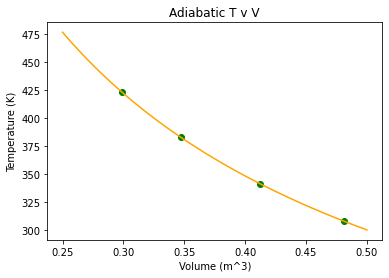

In [50]:
from scipy.optimize import curve_fit
V = np.array([0.481,0.412,0.347,0.299])
TC = np.array([35,68,110,150])
TK = TC+273
plt.plot(V,TK,'go')

def temp(volume,C,gamma):
    return C/(volume**(gamma-1))

params = curve_fit(temp,V,TK)

volume = np.linspace(0.25,0.5,100)
temperature = params[0][0]/(volume**(params[0][1]-1))
plt.plot(volume,temperature,'orange')
print(f'Gamma = {params[0][1]:.2f}')
plt.title('Adiabatic T v V')
plt.xlabel('Volume (m^3)')
plt.ylabel('Temperature (K)')

Text(0.5, 1.0, 'Error= 7.067')

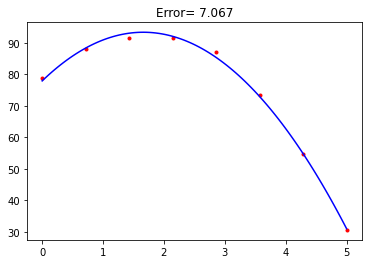

In [9]:
t = [0., 0.71428571, 1.42857143, 2.14285714, 2.85714286, 3.57142857,  4.28571429, 5. ]
y = [78.78630989, 87.99173151, 91.53125627, 91.43891554, 87.10374043, 73.48835482,  54.65018019, 30.65304194]

plt.plot(t,y,'r.')

quadParam = np.polyfit(t,y,2,full=True)
h = quadParam[0][2]
v0 = quadParam[0][1]
a = quadParam[0][0]*2

time = np.linspace(0,5,100)
height = h+v0*time+1/2*a*time**2

plt.plot(time,height,'b')
plt.title(f'Error= {quadParam[1][0]:.3f}')